## Загрузка и первичный анализ данных

* скачаем треки с dropbox
* загрузим треки: данные с Android имеют разделитель ';', с Iphone $-$ ',', также треки с айфона сохраняются как строки, исправим это
* обрежем начало и конец трека (там не движение)
* нарисуем исходные данные, а также график модуля ускорения
* подумаем, по каким признакам можно различить треки

In [1]:
def get_type(name):
    return name.split("_")[-2]

In [2]:
import os
import pandas as pd
path = 'tracks' 
data = {}

Data = []
Target = []

i=0
for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=';')
            if df.shape[1] == 5:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=',')
            if df.shape[1] == 5:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

In [3]:
len(Data)

28

Populating the interactive namespace from numpy and matplotlib
бег


C:\Users\admin\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


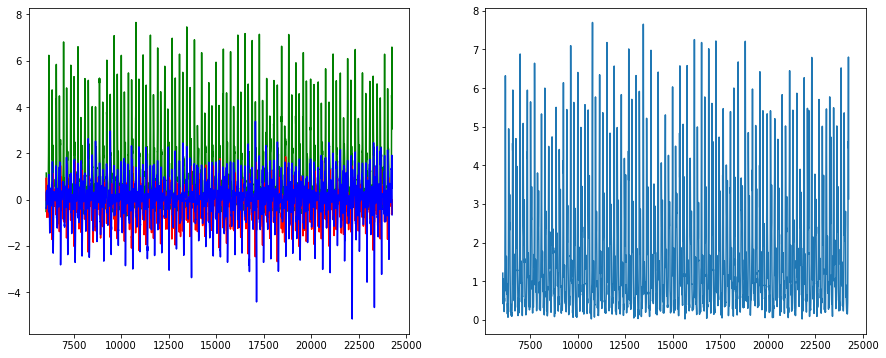

 АМПЛИТУДА: 7.671156993981981

бег


 АМПЛИТУДА: 6.863975662013206

бег


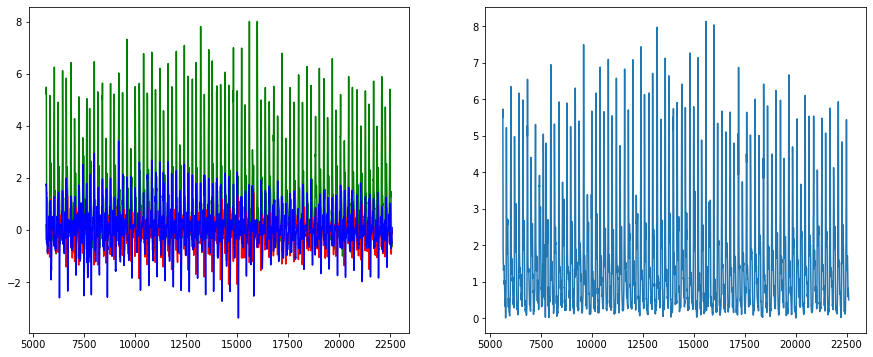

 АМПЛИТУДА: 8.118769286649952

бег


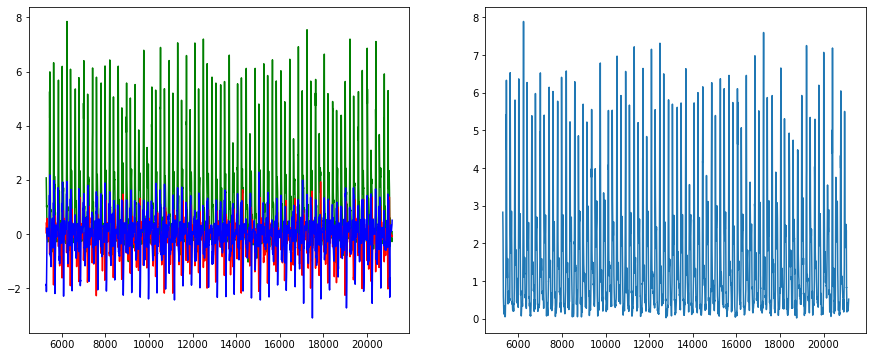

 АМПЛИТУДА: 7.865461631818484

бег


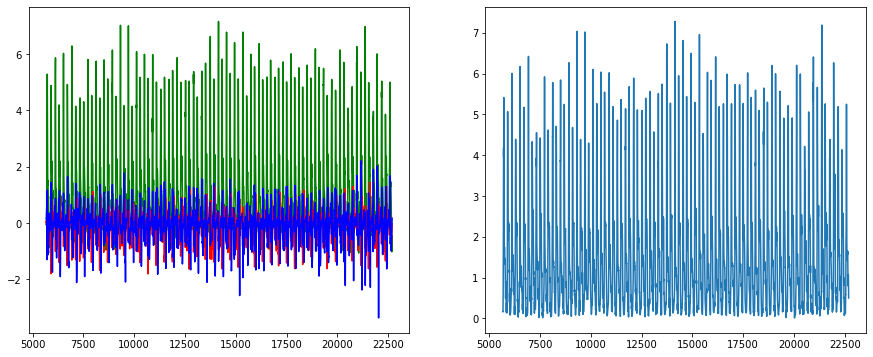

 АМПЛИТУДА: 7.2637676090054235

бег


 АМПЛИТУДА: 7.9487674654618425

бег


 АМПЛИТУДА: 9.568043756732365

лестница


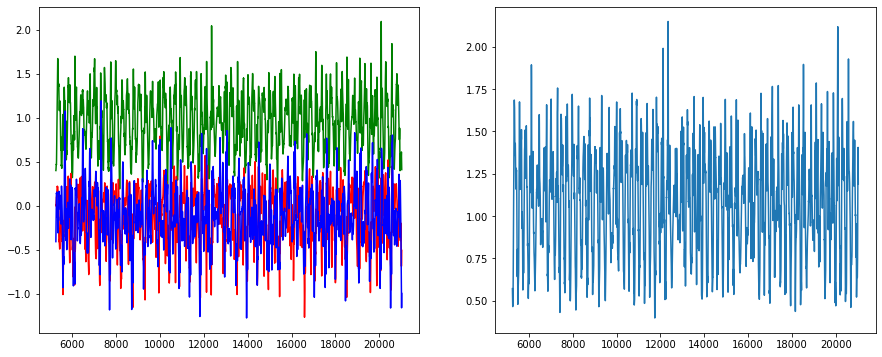

 АМПЛИТУДА: 1.752525115423853

лестница


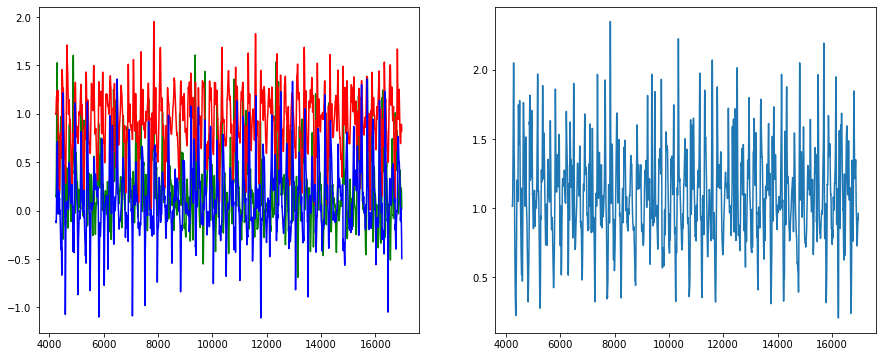

 АМПЛИТУДА: 2.1413656359578486

лестница


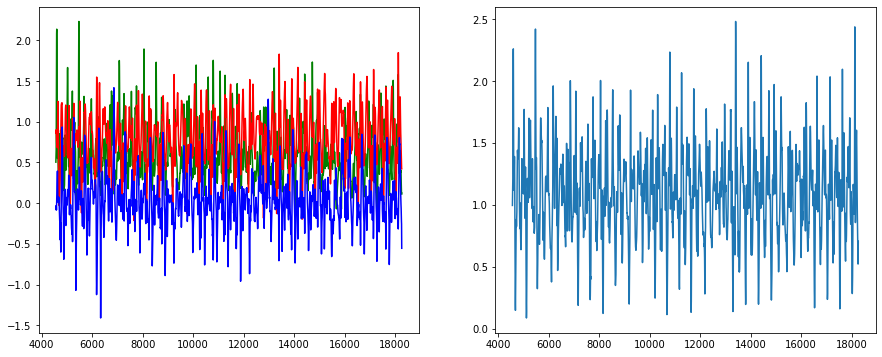

 АМПЛИТУДА: 2.3940077892840774

лестница


 АМПЛИТУДА: 2.2295513536447857

лестница


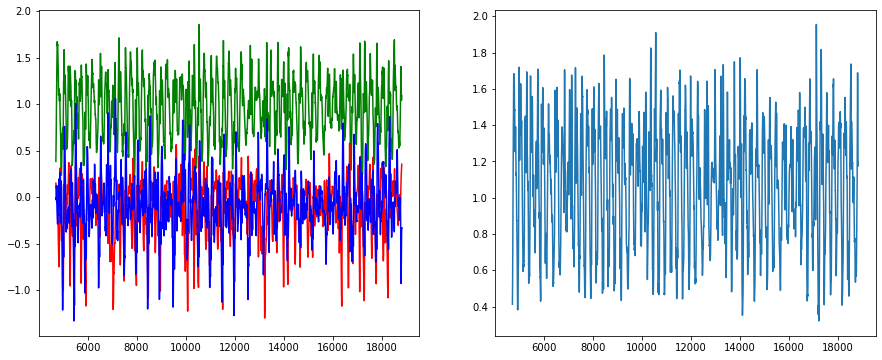

 АМПЛИТУДА: 1.6354498091820258

лестница


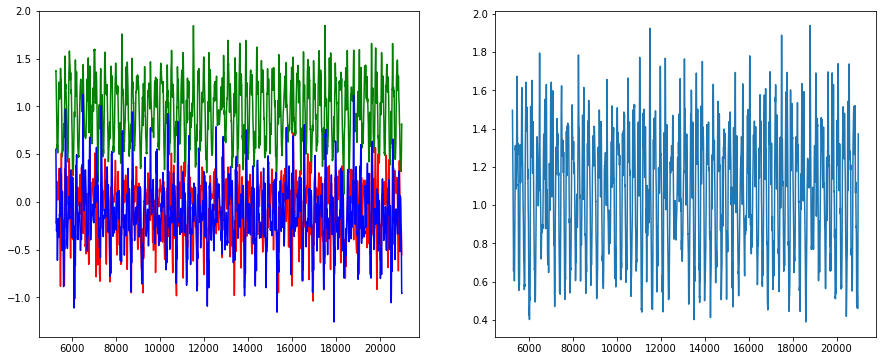

 АМПЛИТУДА: 1.5478233688916851

лестница


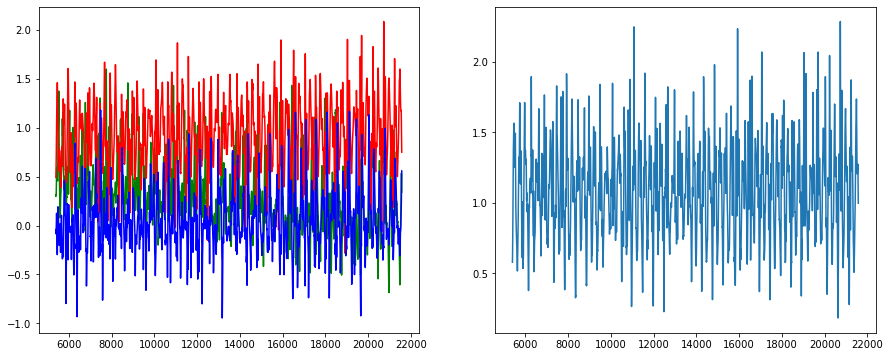

 АМПЛИТУДА: 2.103323495383791

стояние


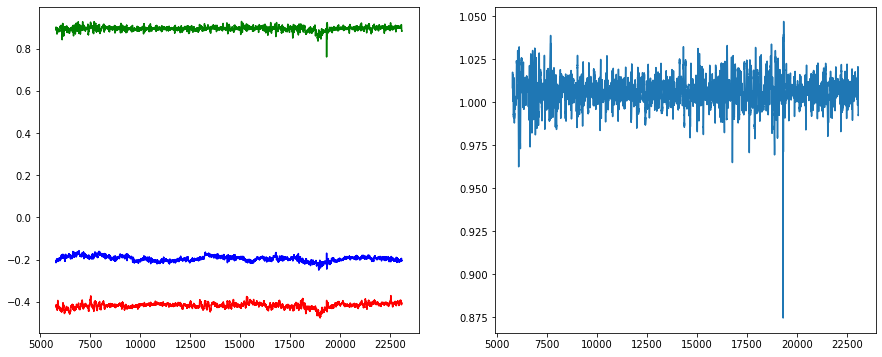

 АМПЛИТУДА: 0.1723185126517991

стояние


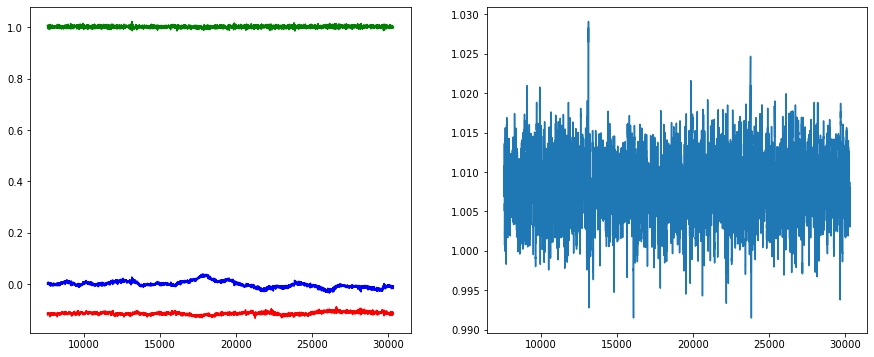

 АМПЛИТУДА: 0.03758427084476146

стояние


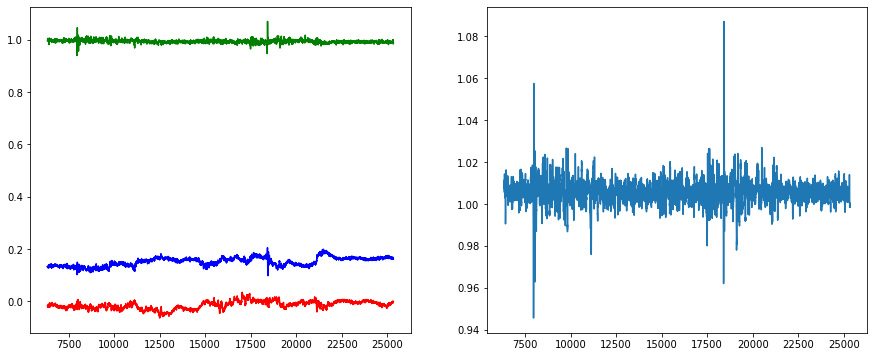

 АМПЛИТУДА: 0.1414352220580427

стояние


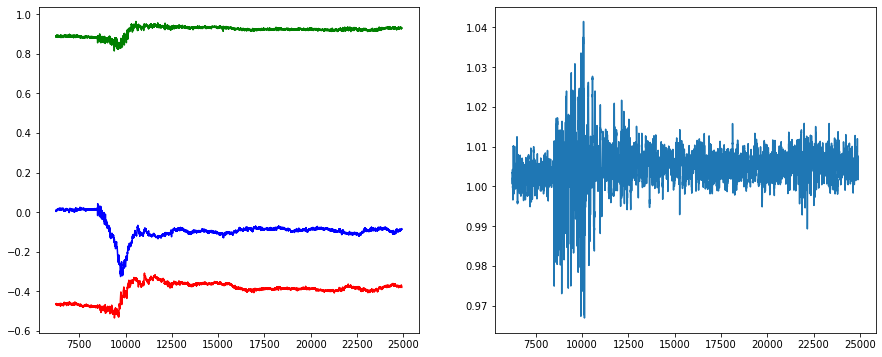

 АМПЛИТУДА: 0.07459026096835064

стояние


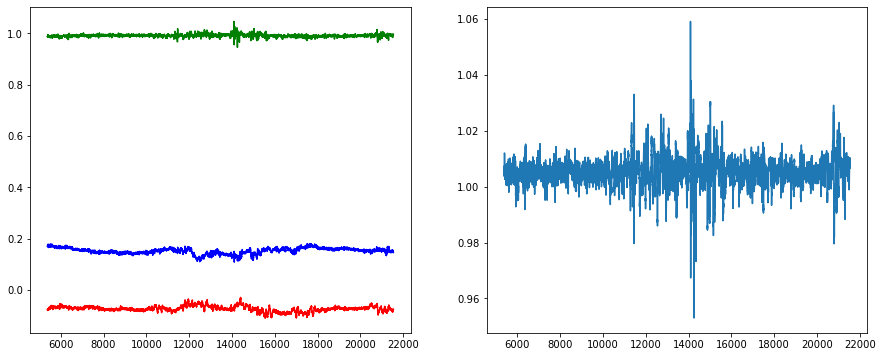

 АМПЛИТУДА: 0.10598747543579701



In [4]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1):
    
# обрезаем начало и конец трека
    if a == -1:
        st = int(len(df)*0.2)
    else:
        st = a
            
    if b == -1:
        end = -int(len(df)*0.2)
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# приводим данные с Iphone к нужному формату
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)

# рисуем графики ускорений
    if cut:
        ax1.plot(df.iloc[st:end]['gFx'],c='g')
        ax1.plot(df.iloc[st:end]['gFy'],c='r')
        ax1.plot(df.iloc[st:end]['gFz'],c='b')
    else:
        ax1.plot(df['gFx'],c='g')
        ax1.plot(df['gFy'],c='r')
        ax1.plot(df['gFz'],c='b')
        
# вычисляем модуль (норму) ускорения и рисуем его
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    ax2.plot(Acc)
    plt.show()

# можно различить многие действия по амплитуде ускорения
    print(' АМПЛИТУДА:', Acc.max()-Acc.min())
    print()
    
    return df



base_tracks = ['ходьба', 'бег', 'лестница', 'велосипед', 'стояние', 'автомобиль']

for df, target in zip(Data,Target):
    track_type = get_type(target)
    if track_type in base_tracks:
        process_data(df, name=track_type)

## Что сделать к следующему занятию (25 июля):

1) Сгруппировать треки по типам движения и выводить на экран сначала все треки одного типа движения, потом другого и т.д. (а не перемешанные).

2) Подумать, по каким признакам можно отличить треки, которые мы не смогли различить по амплитуде? Проверить свои идеи, обсудим в следующий раз.

3) Написать простую предсказательную модель, определяющую тип движения по амплитуде и другим числовым характеристикам. Вычислить долю правильных ответов по всем открытым данным (accuracy).

4) Какие проблемы встречаются в данных? Что с ними делать?

In [5]:
#your code here